# Introduction

Dataset can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

The column names are contained in the following file https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

The original paper which published the dataset can be found here http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

The census from which the dataset was built https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch05.pdf

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [3]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

The MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

<Figure size 432x288 with 0 Axes>

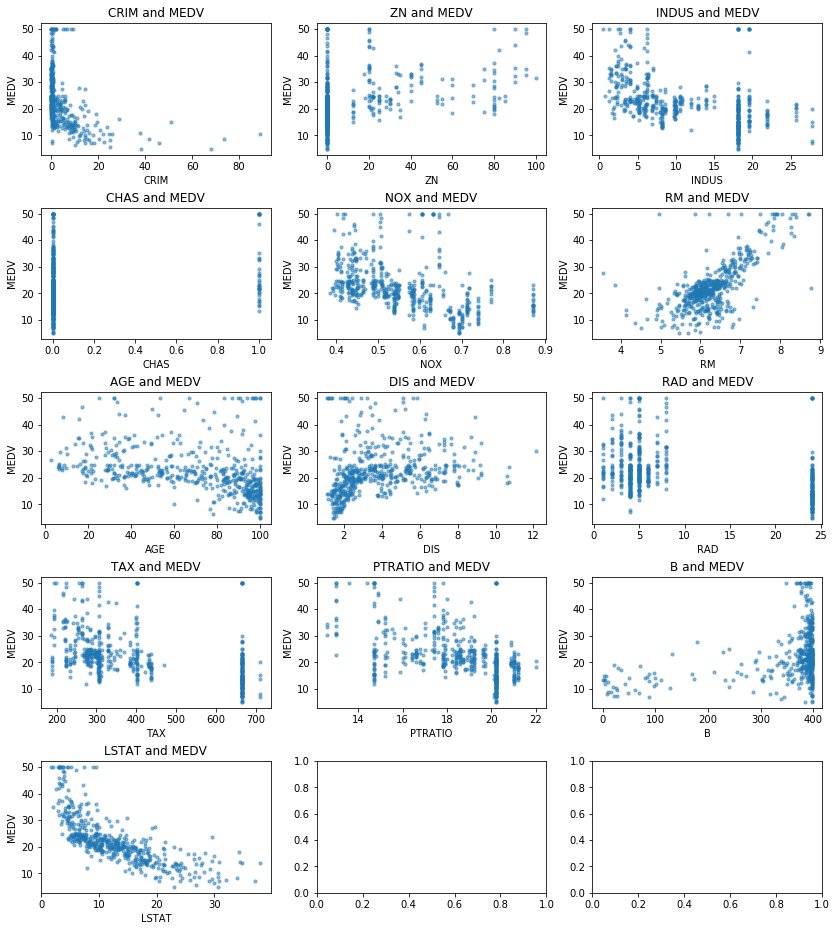

In [4]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

### Creating a correlation heat map

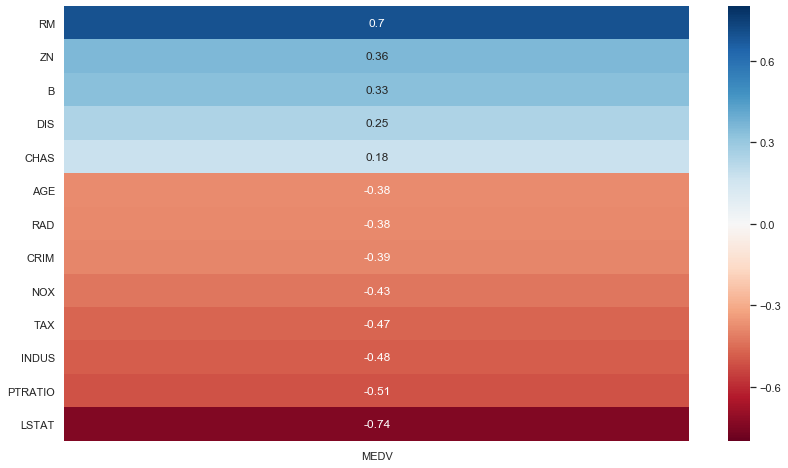

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
corr = df.corr()

# Reducing the correlation matrix to a single column, and 12 rows (not showing MEDV vs MEDV)
corr = pd.DataFrame(corr["MEDV"][0:13])

# Setting the size of the heat map
sns.set(rc={'figure.figsize':(14,8)})

# Sorting corr in descending order
corrSorted = corr.sort_values(by=["MEDV"], ascending=False)

# Creating the correlation heatmap
sns.heatmap(corrSorted, annot=True, cmap='RdBu', vmin=-0.8, vmax=0.8)


# From https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


# Showing the heatmap
plt.show()

### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74),PTRATIO (-0.51) and RM (0.70). These are the variables that I will use later on to build a prediction model to predict the median house price. I will also look at CHAS as the next section looks at using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.

### Summary statistics

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

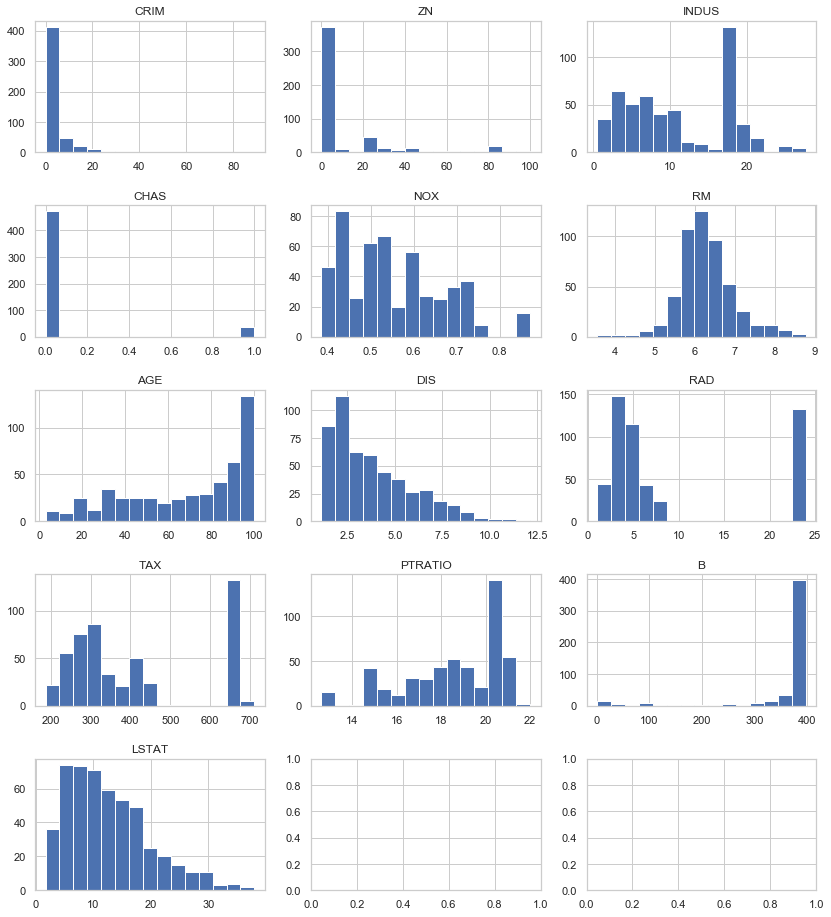

In [33]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].hist(df.iloc[:, i], bins=15)
    axes[row][col].set_title(df.columns[i])
    #axes[row][col].set_xlabel(df.columns[i])        
    #axes[row][col].set_ylabel('')
plt.show()

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data [towardsdatascience-Inferential Statistics for Data Science](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a). Inferential statistics can be used to determine the probability that there is a true relationship between two variables [Science Direct-Inferential Statistics](https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics).  

### Selecting an appropriate test



#### Requirements for a Student t-test

Before conducting a t-test we will first examine if doing a t-test in this case is appropriate. 

(need reference to list of requirements for t-test)


MEDV distribution for tracts along Charles River and MEDV distribution for tracts not along Charles River.

As the two CHAS variables are independent of each other then an independent t-test should be used as apposed to .....

There will be only one comparison made: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.


...........

Unequal sample sizes and different variances, therefore Student t-test is not appropriate

#### Requirements for a Welch t-test
Welch test can be used in place of the student t-test where the variance and/or sample sizes differ.


However, as seen below the distributions are not normal which is also a requirement for the Welch test **give reference**

#### Non-Parametric Data

As the data is not normally distributed a non-parametric test should be used. [University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests). The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests)


#### Visualising the data to determine if they are normally distributed

In [7]:
# Importing seaborn to create distplots
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


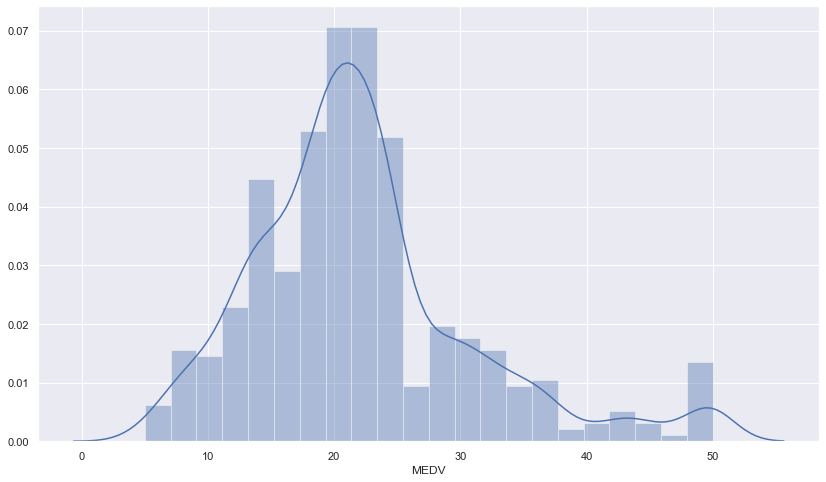

In [8]:
# Displot for tract not along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 0])

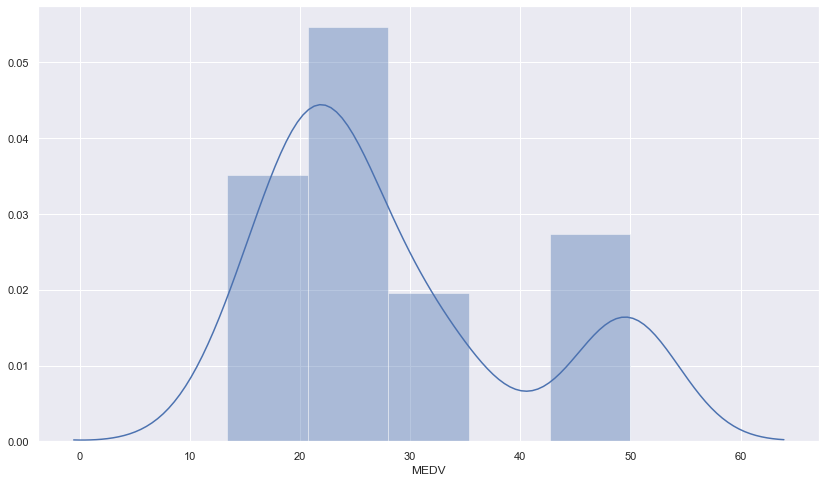

In [9]:
# Displot for tract along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 1])

In [10]:
# Importing stats module from scipy
from scipy import stats

# Determining if the distribution for tracts along Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 1])

(0.8359232544898987, 0.00011230883683310822)

In [11]:
# Determining if the distribution for tracts not along the Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 0])

(0.9282605051994324, 3.113930960958397e-14)

In [12]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [13]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [14]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [15]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

### Student t-test

The p-value for the Student t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [16]:
# Code for Student t-test

from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [17]:
# Code for Welch t-test

from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 which strongly suggests that the sample distributions are different.

In [18]:
# Code for Mann-Whitney U test

from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

### Hypothesis testing

## Predict

This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity [machinelearningmastery - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [19]:
import numpy as np

# Adapted from course materials
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables 'PTRATIO', 'RM' and 'INDUS' and the target variable 'MEDV'

In [20]:
# Input/independent variables
X = df.drop(columns=["MEDV", "CHAS"])

# Output/dependent variable
y = df["MEDV"]

In [21]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [23]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
110,0.10793,0.0,8.56,0.520,6.195,54.4,2.7778,5,384.0,20.9,393.49,13.00,0,1
90,0.04684,0.0,3.41,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81,0,1
369,5.66998,0.0,18.10,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,1,0
243,0.12757,30.0,4.93,0.428,6.393,7.8,7.0355,6,300.0,16.6,374.71,5.19,0,1
422,12.04820,0.0,18.10,0.614,5.648,87.6,1.9512,24,666.0,20.2,291.55,14.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.88125,0.0,21.89,0.624,5.637,94.7,1.9799,4,437.0,21.2,396.90,18.34,0,1
450,6.71772,0.0,18.10,0.713,6.749,92.6,2.3236,24,666.0,20.2,0.32,17.44,0,1
147,2.36862,0.0,19.58,0.871,4.926,95.7,1.4608,5,403.0,14.7,391.71,29.53,0,1
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,0,1


In [25]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
347,0.01870,85.0,4.15,0.4290,6.516,27.7,8.5353,4,351.0,17.9,392.43,6.36,0,1
283,0.01501,90.0,1.21,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,1,0
36,0.09744,0.0,5.96,0.4990,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,0,1
480,5.82401,0.0,18.10,0.5320,6.242,64.7,3.4242,24,666.0,20.2,396.90,10.74,0,1
306,0.07503,33.0,2.18,0.4720,7.420,71.9,3.0992,7,222.0,18.4,396.90,6.47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.09068,45.0,3.44,0.4370,6.951,21.5,6.4798,5,398.0,15.2,377.68,5.10,0,1
29,1.00245,0.0,8.14,0.5380,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98,0,1
200,0.01778,95.0,1.47,0.4030,7.135,13.9,7.6534,3,402.0,17.0,384.30,4.45,0,1
460,4.81213,0.0,18.10,0.7130,6.701,90.0,2.5975,24,666.0,20.2,255.23,16.42,0,1


In [26]:
y_train

110    21.7
90     22.6
369    50.0
243    23.7
422    20.8
       ... 
129    14.3
450    13.4
147    14.6
16     23.1
278    29.1
Name: MEDV, Length: 339, dtype: float64

In [27]:
y_test

347    23.1
283    50.0
36     20.0
480    23.0
306    33.4
       ... 
190    37.0
29     21.0
200    32.9
460    16.4
64     33.0
Name: MEDV, Length: 167, dtype: float64

### Preprocessing the dataset

#### Scaling the dataset

In [28]:
# Adapted from course materials
import pandas as pd
import sklearn.preprocessing as pre
import numpy as np


scaler = pre.StandardScaler()
scaler.fit(X_train)

scaled_X_train =  pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


#### Whitening the dataset

In [29]:
# Adapted from course materials
import sklearn.decomposition as dec
pca = dec.PCA(n_components=len(X_train.columns), whiten=True)
pca.fit(X_train)

whitened_X_train = pd.DataFrame(pca.transform(X_train), columns=X_train.columns)
whitened_X_test = pd.DataFrame(pca.transform(X_test), columns=X_test.columns)

#### Combining Whitening with Scaling

In [30]:
# Adapted from course materials
import sklearn.decomposition as dec
pca = dec.PCA(n_components=len(scaled_X_train.columns), whiten=True)
pca.fit(scaled_X_train)

whitenedAndScaled_X_train = pd.DataFrame(pca.transform(scaled_X_train), columns=scaled_X_train.columns)
whitenedAndScaled_X_test = pd.DataFrame(pca.transform(scaled_X_test), columns=scaled_X_test.columns)

### Defining the neural net

There are 3 input variables so the input_dim below is set to 3. Experimenting with 1.5 times more hidden nodes in the first layer compared to the input layer. Second hidden layer has the same number of nodes (4) as the input layer. All layers are using the ReLU activation function. **(Why and explanation of ReLU)**

In [31]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Defining the neural network
model = Sequential()
model.add(Dense(28, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='relu'))

Using TensorFlow backend.


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Initially setting this to a Mean Squared Error Loss fuction.

In [33]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [34]:
# Fitting the neural net
model.fit(whitened_X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
339/339 [==============================] - 0s 841us/step - loss: 486.8409
Epoch 2/150
339/339 [==============================] - 0s 380us/step - loss: 337.8699
Epoch 3/150
339/339 [==============================] - 0s 381us/step - loss: 236.4402
Epoch 4/150
339/339 [==============================] - 0s 372us/step - loss: 202.5178
Epoch 5/150
339/339 [==============================] - 0s 360us/step - loss: 176.5771
Epoch 6/150
339/339 [==============================] - 0s 345us/step - loss: 146.3270 0s - loss: 146.587
Epoch 7/150
339/339 [==============================] - 0s 374us/step - loss: 118.6081 0s - loss: 121.479
Epoch 8/150
339/339 [==============================] - 0s 330us/step - loss: 93.3832
Epoch 9/150
339/339 [==============================] - 0s 371us/step - loss: 73.37800s - loss: 67.
Epoch 10/150
339/339 [==============================] - 0s 371us/step - loss: 58.5873
Epoch 11/150
339/339 [==============================] - 0s 410us/step - loss: 47.8749
Epoc

### Evaluating the neural net

In [35]:
y_predicted = model.predict(whitened_X_test)

absoluteError = 0

for i in range(len(y_predicted)):
    print(f"Predicted: {y_predicted[i,0]}, Actual: {y_test.iloc[i]}, Difference: {y_predicted[i,0] - y_test.iloc[i]}")
    absoluteError = absoluteError + (y_predicted[i,0] - y_test.iloc[i])**2
    
meanAbsoluteError = absoluteError/len(y_predicted)

rootMeanSquareError = meanAbsoluteError**0.5

rootMeanSquareError

Predicted: 24.057836532592773, Actual: 23.1, Difference: 0.957836532592772
Predicted: 48.198421478271484, Actual: 50.0, Difference: -1.8015785217285156
Predicted: 24.323095321655273, Actual: 20.0, Difference: 4.323095321655273
Predicted: 22.541217803955078, Actual: 23.0, Difference: -0.4587821960449219
Predicted: 36.75703811645508, Actual: 33.4, Difference: 3.3570381164550795
Predicted: 22.300439834594727, Actual: 23.4, Difference: -1.099560165405272
Predicted: 8.99146556854248, Actual: 9.7, Difference: -0.7085344314575188
Predicted: 21.245210647583008, Actual: 20.4, Difference: 0.8452106475830092
Predicted: 18.994300842285156, Actual: 21.2, Difference: -2.205699157714843
Predicted: 17.289817810058594, Actual: 19.6, Difference: -2.3101821899414077
Predicted: 25.25501823425293, Actual: 20.6, Difference: 4.655018234252928
Predicted: 23.203872680664062, Actual: 27.5, Difference: -4.2961273193359375
Predicted: 23.41993522644043, Actual: 21.2, Difference: 2.2199352264404304
Predicted: 14.37

3.806471928439128

### Creating a function for the machine learning algorithm

In [36]:
def neuralNet(XTrain, XTest, yTrain, yTest):
    # Importing packages
    from keras.models import Sequential
    from keras.layers import Dense

    # Defining the neural network
    model = Sequential()
    model.add(Dense(28, input_dim=len(XTrain.columns), activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='adam')


    # Fitting the neural net
    model.fit(XTrain, yTrain, epochs=150, batch_size=8, verbose=0)


    # Get the MSE
    mse = model.evaluate(XTest, yTest)  
    
    # Get the RMSE by getting the square root of the MSE
    rmse = mse ** 0.5
    
    return rmse

In [37]:
neuralNet(X_train, X_test, y_train, y_test)

167/167 [==============================] - 0s 221us/step


4.489149693999973

In [38]:
neuralNet(scaled_X_train, scaled_X_test, y_train, y_test)

167/167 [==============================] - 0s 509us/step


4.1115977018329435

In [39]:
neuralNet(whitened_X_train, whitened_X_test, y_train, y_test)

167/167 [==============================] - 0s 898us/step


3.4546265142924084

In [40]:
neuralNet(whitenedAndScaled_X_train, whitenedAndScaled_X_test, y_train, y_test)

167/167 [==============================] - 0s 120us/step


4.837556490692023